#### 컬럼 설명 
매장 - 매장번호
날짜 - 판매 주
Weekly_Sales - 해당 매장의 매출
Holiday_Flag - 해당 주가 특별 공휴일인지 여부 1 – 공휴일 주 0 – 비공휴일 주
온도 - 판매 당일 온도
Fuel_Price - 해당 지역의 연료 비용
CPI – 현재 소비자 물가 지수
실업 - 현재 실업률
휴일 이벤트<br /> 슈퍼볼: 2월 10일, 2011년 2월 11일, 2012년 2월 10일, 13일 2월 8일<br /> 노동절: 2010년 9월 10일, 2011년 9월 9일 , 2012년 9월 7일, 2013년 9월 6일<br /> 추수감사절: 2010년 11월 26일, 2011년 11월 25일, 2012년 11월 23일, 13일 11월 29일<br /> 크리스마스: 12월 31일 -10, 2011년 12월 30일, 2012년 12월 28일, 2013년 12월 27일

In [63]:
import pandas as pd
import numpy as np

w_df = pd.read_csv('./datasets/Walmart.csv')
w_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [64]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [65]:
w_df.duplicated().sum()

0

In [66]:
w_df = w_df.drop(labels=['Store', 'Holiday_Flag'], axis=1)

array([[<Axes: title={'center': 'Weekly_Sales'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'Fuel_Price'}>,
        <Axes: title={'center': 'CPI'}>],
       [<Axes: title={'center': 'Unemployment'}>, <Axes: >]], dtype=object)

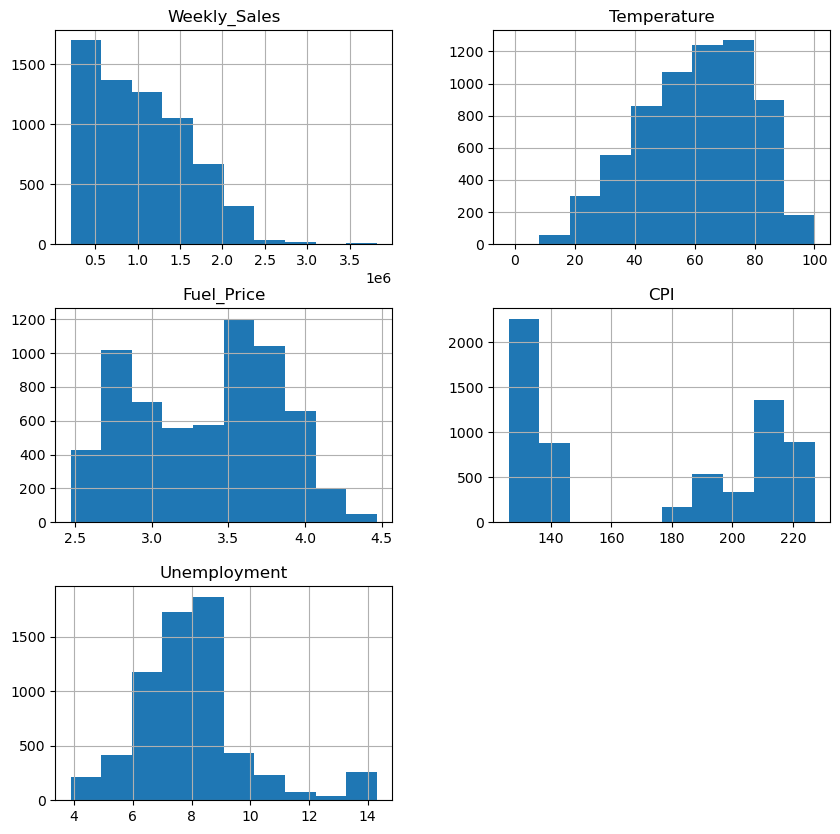

In [67]:
w_df.hist(figsize=(10,10))

In [68]:
w_df.loc[:, 'Date'] = pd.to_datetime(w_df.Date, dayfirst=True)
w_df

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05 00:00:00,1643690.90,42.31,2.572,211.096358,8.106
1,2010-02-12 00:00:00,1641957.44,38.51,2.548,211.242170,8.106
2,2010-02-19 00:00:00,1611968.17,39.93,2.514,211.289143,8.106
3,2010-02-26 00:00:00,1409727.59,46.63,2.561,211.319643,8.106
4,2010-03-05 00:00:00,1554806.68,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...
6430,2012-09-28 00:00:00,713173.95,64.88,3.997,192.013558,8.684
6431,2012-10-05 00:00:00,733455.07,64.89,3.985,192.170412,8.667
6432,2012-10-12 00:00:00,734464.36,54.47,4.000,192.327265,8.667
6433,2012-10-19 00:00:00,718125.53,56.47,3.969,192.330854,8.667


C:\Users\user\AppData\Local\Temp\ipykernel_1084\1601545640.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(w_df.loc[:,'Weekly_Sales'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


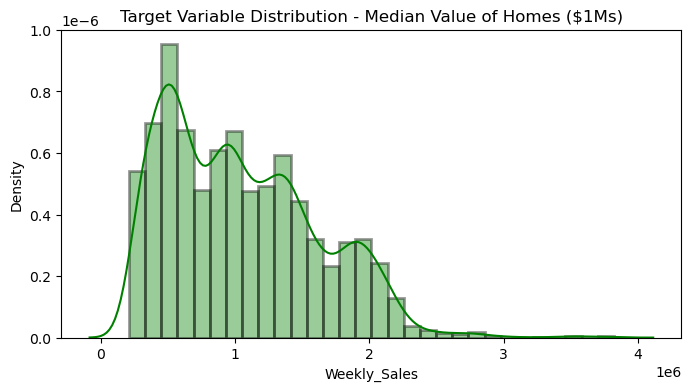

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=[8,4])
sns.distplot(w_df.loc[:,'Weekly_Sales'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

In [7]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6435 non-null   object 
 1   Weekly_Sales  6435 non-null   float64
 2   Temperature   6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   CPI           6435 non-null   float64
 5   Unemployment  6435 non-null   float64
dtypes: float64(5), object(1)
memory usage: 301.8+ KB


In [70]:
pre_df = w_df.copy()

In [71]:
pre_df

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05 00:00:00,1643690.90,42.31,2.572,211.096358,8.106
1,2010-02-12 00:00:00,1641957.44,38.51,2.548,211.242170,8.106
2,2010-02-19 00:00:00,1611968.17,39.93,2.514,211.289143,8.106
3,2010-02-26 00:00:00,1409727.59,46.63,2.561,211.319643,8.106
4,2010-03-05 00:00:00,1554806.68,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...
6430,2012-09-28 00:00:00,713173.95,64.88,3.997,192.013558,8.684
6431,2012-10-05 00:00:00,733455.07,64.89,3.985,192.170412,8.667
6432,2012-10-12 00:00:00,734464.36,54.47,4.000,192.327265,8.667
6433,2012-10-19 00:00:00,718125.53,56.47,3.969,192.330854,8.667


In [72]:
pre_df = pre_df.drop(labels=['Date'], axis=1)

In [73]:
pre_df

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,42.31,2.572,211.096358,8.106
1,1641957.44,38.51,2.548,211.242170,8.106
2,1611968.17,39.93,2.514,211.289143,8.106
3,1409727.59,46.63,2.561,211.319643,8.106
4,1554806.68,46.50,2.625,211.350143,8.106
...,...,...,...,...,...
6430,713173.95,64.88,3.997,192.013558,8.684
6431,733455.07,64.89,3.985,192.170412,8.667
6432,734464.36,54.47,4.000,192.327265,8.667
6433,718125.53,56.47,3.969,192.330854,8.667


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [14]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 3.1240, RMSE: 1.7675, MSLE: 0.0367, RMSLE: 0.1916, R2: 0.1347


In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [16]:
prediction = l_r.predict(X_test)
get_evaluation(y_test.values, prediction)

MSE: 2.9024, RMSE: 1.7036, MSLE: 0.0334, RMSLE: 0.1829, R2: 0.1961


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression


features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.7, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 1.7760, RMSE: 1.3327, MSLE: 0.0245, RMSLE: 0.1567, R2: 0.4999
RandomForestRegressor
MSE: 0.9937, RMSE: 0.9969, MSLE: 0.0139, RMSLE: 0.1181, R2: 0.7202
GradientBoostingRegressor
MSE: 1.3992, RMSE: 1.1829, MSLE: 0.0191, RMSLE: 0.1382, R2: 0.6060
XGBRegressor
MSE: 1.0655, RMSE: 1.0322, MSLE: 0.0153, RMSLE: 0.1237, R2: 0.7000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 1930, number of used features: 4
[LightGBM] [Info] Start training from score 8.048555
LGBMRegressor
MSE: 1.0032, RMSE: 1.0016, MSLE: 0.0143, RMSLE: 0.1198, R2: 0.7175


#### 전처리 없이 가장 회귀 성능이 좋았던 회귀 모델은 RandomForesetRegressor로 R2값이 0.72값이 나왔다.

### 📌 전처리 및 OLS , VIF 진행

array([[<Axes: title={'center': 'Weekly_Sales'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'Fuel_Price'}>,
        <Axes: title={'center': 'CPI'}>],
       [<Axes: title={'center': 'Unemployment'}>, <Axes: >]], dtype=object)

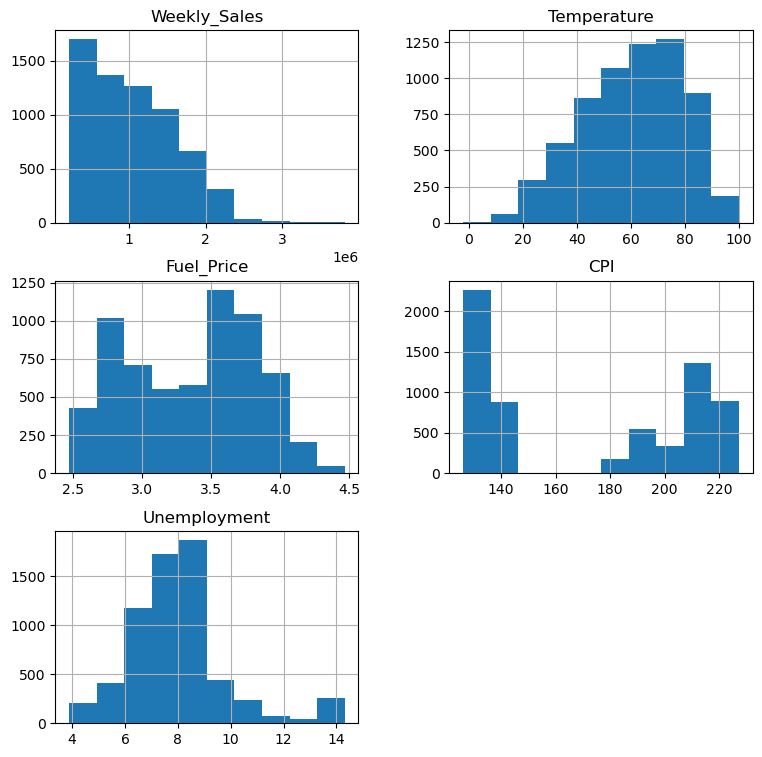

In [18]:
pre_df.hist(figsize=(9,9))

In [19]:
pre_df.corr()['Unemployment'].sort_values(ascending=False)[1:]

Temperature     0.101158
Fuel_Price     -0.034684
Weekly_Sales   -0.106176
CPI            -0.302020
Name: Unemployment, dtype: float64

In [20]:
pre_df['CPI'].value_counts()

CPI
130.550207    11
129.043200    11
127.580032    11
127.440484    11
127.300935    11
              ..
214.751084     1
214.815521     1
214.961638     1
215.107755     1
214.741539     1
Name: count, Length: 2145, dtype: int64

In [21]:
pre_df.CPI.describe().T

count    6435.000000
mean      171.578394
std        39.356712
min       126.064000
25%       131.735000
50%       182.616521
75%       212.743293
max       227.232807
Name: CPI, dtype: float64

In [22]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:, :-1] , pre_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           Unemployment   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                          2.227e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):                        0.00
Time:                        16:48:57   Log-Likelihood:                         -14002.
No. Observations:                6435   AIC:                                  2.801e+04
Df Residuals:                    6431   BIC:                                  2.804e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [24]:
get_vif(features)

,vif_score,feature
0,4.232036,Weekly_Sales
1,12.446074,Temperature
2,19.867720,Fuel_Price
3,14.681643,CPI


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

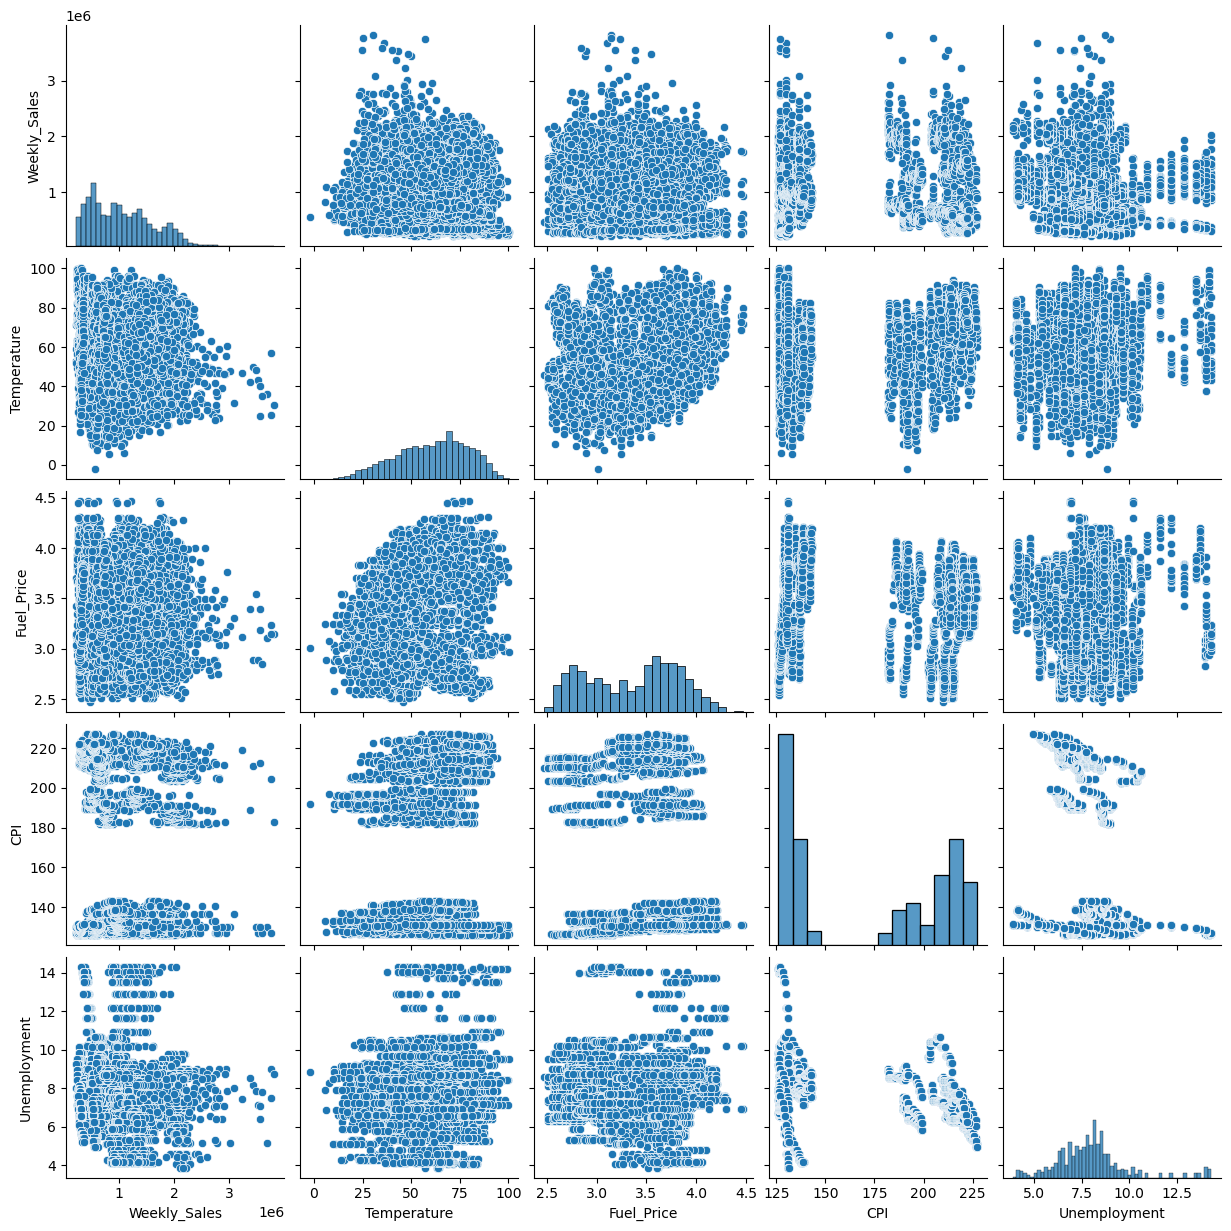

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Weekly_Sales','Temperature','Fuel_Price' , 'CPI', 'Unemployment']

sns.pairplot(pre_df[columns])
plt.show()

In [26]:
new_df = pre_df.copy()

In [27]:
new_df = new_df.drop(labels=['Temperature', 'Fuel_Price', 'CPI'], axis=1)
new_df

,Weekly_Sales,Unemployment
0,1643690.90,8.106
1,1641957.44,8.106
2,1611968.17,8.106
3,1409727.59,8.106
4,1554806.68,8.106
...,...,...
6430,713173.95,8.684
6431,733455.07,8.667
6432,734464.36,8.667
6433,718125.53,8.667


In [28]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(new_df)
std_pre_df = pd.DataFrame(result, columns=new_df.columns)
std_pre_df

,Weekly_Sales,Unemployment
0,1.057420,0.056964
1,1.054348,0.056964
2,1.001206,0.056964
3,0.642828,0.056964
4,0.899914,0.056964
...,...,...
6430,-0.591489,0.365109
6431,-0.555551,0.356046
6432,-0.553762,0.356046
6433,-0.582715,0.356046


In [29]:
condition = True

for column in std_pre_df.columns:
    condition &= std_pre_df[column].between(-1.96, 1.96)

std_pre_df = std_pre_df[condition]
std_pre_df

,Weekly_Sales,Unemployment
0,1.057420,0.056964
1,1.054348,0.056964
2,1.001206,0.056964
3,0.642828,0.056964
4,0.899914,0.056964
...,...,...
6430,-0.591489,0.365109
6431,-0.555551,0.356046
6432,-0.553762,0.356046
6433,-0.582715,0.356046


In [30]:
std_pre_df.reset_index(drop=True, inplace=True)

In [31]:
std_pre_df

,Weekly_Sales,Unemployment
0,1.057420,0.056964
1,1.054348,0.056964
2,1.001206,0.056964
3,0.642828,0.056964
4,0.899914,0.056964
...,...,...
5817,-0.591489,0.365109
5818,-0.555551,0.356046
5819,-0.553762,0.356046
5820,-0.582715,0.356046


array([[<Axes: title={'center': 'Weekly_Sales'}>,
        <Axes: title={'center': 'Unemployment'}>]], dtype=object)

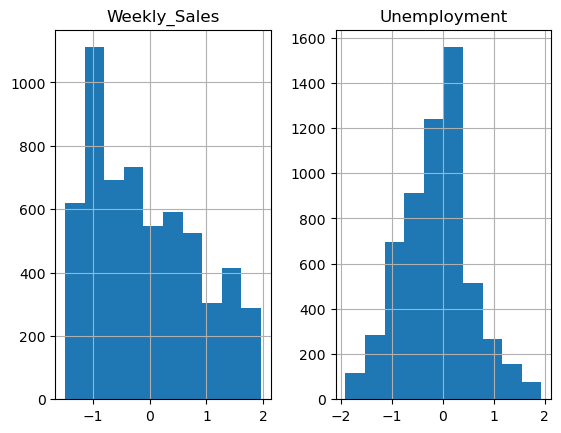

In [32]:
std_pre_df.hist()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = std_pre_df.iloc[:,:-1], std_pre_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.5, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f},R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [35]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.4542, RMSE: 0.6739,R2: 0.0029


In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.5, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [37]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.4494, RMSE: 0.6704,R2: 0.0134


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression


features, targets = std_pre_df.iloc[:,:-1], std_pre_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.5, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.8281, RMSE: 0.9100,R2: -0.8179
RandomForestRegressor
MSE: 0.6016, RMSE: 0.7756,R2: -0.3206
GradientBoostingRegressor
MSE: 0.4275, RMSE: 0.6538,R2: 0.0615
XGBRegressor
MSE: 0.4441, RMSE: 0.6664,R2: 0.0252
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 2911, number of used features: 1
[LightGBM] [Info] Start training from score -0.130359
LGBMRegressor
MSE: 0.4427, RMSE: 0.6654,R2: 0.0281


In [39]:
std_pre_df

,Weekly_Sales,Unemployment
0,1.057420,0.056964
1,1.054348,0.056964
2,1.001206,0.056964
3,0.642828,0.056964
4,0.899914,0.056964
...,...,...
5817,-0.591489,0.365109
5818,-0.555551,0.356046
5819,-0.553762,0.356046
5820,-0.582715,0.356046


In [40]:
std_pre_df.iloc[:,-1]

0       0.056964
1       0.056964
2       0.056964
3       0.056964
4       0.056964
          ...   
5817    0.365109
5818    0.356046
5819    0.356046
5820    0.356046
5821    0.356046
Name: Unemployment, Length: 5822, dtype: float64

In [41]:
pre_df = pre_df.iloc[std_pre_df.index].reset_index(drop=True)
pre_df

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,42.31,2.572,211.096358,8.106
1,1641957.44,38.51,2.548,211.242170,8.106
2,1611968.17,39.93,2.514,211.289143,8.106
3,1409727.59,46.63,2.561,211.319643,8.106
4,1554806.68,46.50,2.625,211.350143,8.106
...,...,...,...,...,...
5817,1682368.32,25.01,3.266,195.984169,6.759
5818,2263722.68,25.59,3.173,196.171389,6.759
5819,1264014.16,34.12,3.119,196.358610,6.759
5820,1208191.61,37.21,3.095,196.545831,6.589


In [42]:
pre_df.corr()['Unemployment'].sort_values(ascending=False)[1:]

Temperature     0.090662
Fuel_Price     -0.015247
Weekly_Sales   -0.104260
CPI            -0.356101
Name: Unemployment, dtype: float64

In [43]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:, 1:] , pre_df.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.774
Method:                 Least Squares   F-statistic:                              4985.
Date:                Wed, 01 May 2024   Prob (F-statistic):                        0.00
Time:                        16:49:03   Log-Likelihood:                         -85574.
No. Observations:                5822   AIC:                                  1.712e+05
Df Residuals:                    5818   BIC:                                  1.712e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [45]:
get_vif(features)

,vif_score,feature
0,12.964971,Temperature
1,25.851590,Fuel_Price
2,14.498812,CPI
3,14.401033,Unemployment


In [46]:
pre_df = pre_df.drop(labels=['Fuel_Price'], axis=1)

In [47]:
get_vif(features)

,vif_score,feature
0,12.964971,Temperature
1,25.851590,Fuel_Price
2,14.498812,CPI
3,14.401033,Unemployment


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

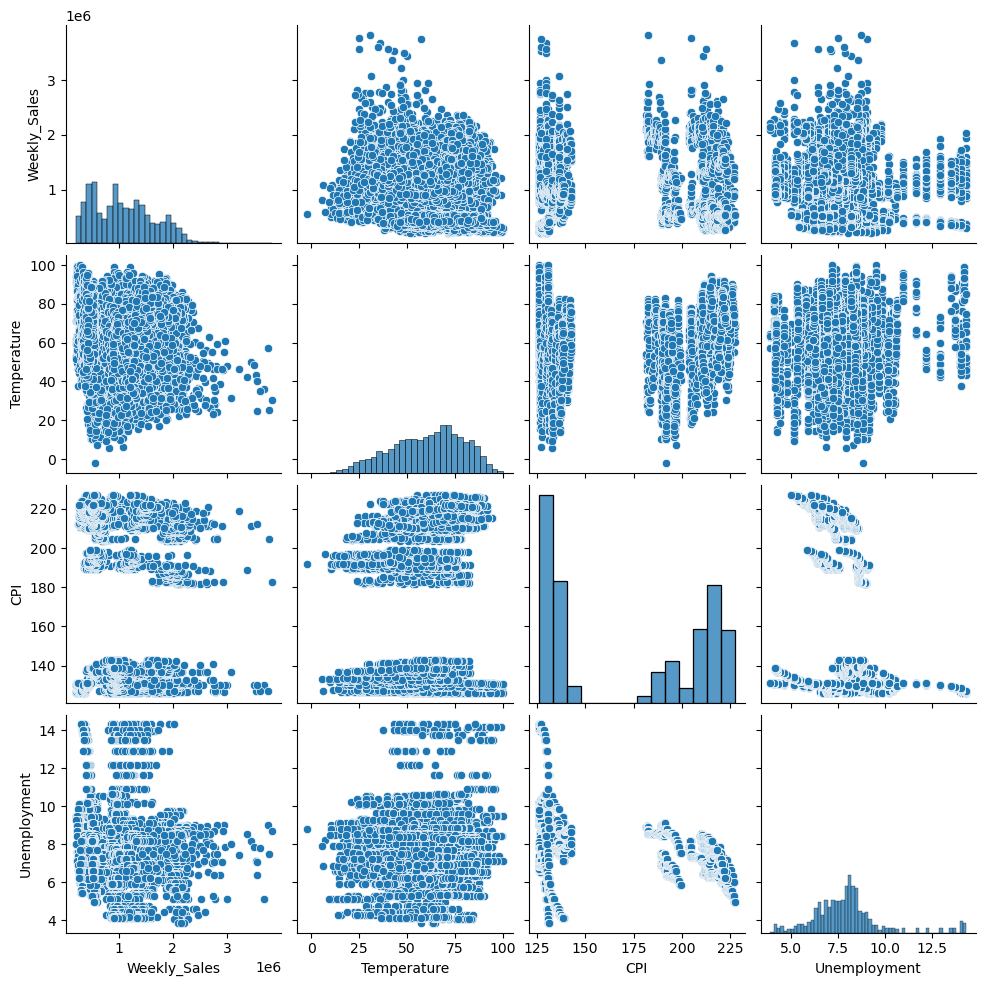

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Weekly_Sales','Temperature', 'CPI', 'Unemployment']

sns.pairplot(pre_df[columns])
plt.show()

In [49]:
new_df = pre_df.copy()

In [50]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(new_df)
std_pre_df = pd.DataFrame(result, columns=new_df.columns)
std_pre_df

,Weekly_Sales,Temperature,CPI,Unemployment
0,0.970326,-0.980073,0.977924,0.071722
1,0.967278,-1.185129,0.981595,0.071722
2,0.914545,-1.108502,0.982778,0.071722
3,0.558925,-0.746956,0.983545,0.071722
4,0.814032,-0.753971,0.984313,0.071722
...,...,...,...,...
5817,1.038337,-1.913617,0.597467,-0.630362
5818,2.060591,-1.882319,0.602180,-0.630362
5819,0.302702,-1.422022,0.606894,-0.630362
5820,0.204544,-1.255279,0.611607,-0.718969


In [51]:
condition = True

for column in std_pre_df.columns:
    condition &= std_pre_df[column].between(-1.96, 1.96)

std_pre_df = std_pre_df[condition]
std_pre_df

,Weekly_Sales,Temperature,CPI,Unemployment
0,0.970326,-0.980073,0.977924,0.071722
1,0.967278,-1.185129,0.981595,0.071722
2,0.914545,-1.108502,0.982778,0.071722
3,0.558925,-0.746956,0.983545,0.071722
4,0.814032,-0.753971,0.984313,0.071722
...,...,...,...,...
5815,0.352680,-1.399898,0.593393,-0.630362
5817,1.038337,-1.913617,0.597467,-0.630362
5819,0.302702,-1.422022,0.606894,-0.630362
5820,0.204544,-1.255279,0.611607,-0.718969


In [52]:
std_pre_df.reset_index(drop=True, inplace=True)
std_pre_df

,Weekly_Sales,Temperature,CPI,Unemployment
0,0.970326,-0.980073,0.977924,0.071722
1,0.967278,-1.185129,0.981595,0.071722
2,0.914545,-1.108502,0.982778,0.071722
3,0.558925,-0.746956,0.983545,0.071722
4,0.814032,-0.753971,0.984313,0.071722
...,...,...,...,...
5080,0.352680,-1.399898,0.593393,-0.630362
5081,1.038337,-1.913617,0.597467,-0.630362
5082,0.302702,-1.422022,0.606894,-0.630362
5083,0.204544,-1.255279,0.611607,-0.718969


In [53]:
pre_df = pre_df.iloc[std_pre_df.index].reset_index(drop=True)
pre_df

,Weekly_Sales,Temperature,CPI,Unemployment
0,1643690.90,42.31,211.096358,8.106
1,1641957.44,38.51,211.242170,8.106
2,1611968.17,39.93,211.289143,8.106
3,1409727.59,46.63,211.319643,8.106
4,1554806.68,46.50,211.350143,8.106
...,...,...,...,...
5080,385631.48,85.63,214.108365,8.177
5081,361311.41,83.31,214.171342,8.177
5082,354361.08,84.99,214.234318,8.177
5083,381017.75,86.71,214.297294,8.177


array([[<Axes: title={'center': 'Weekly_Sales'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'Unemployment'}>]], dtype=object)

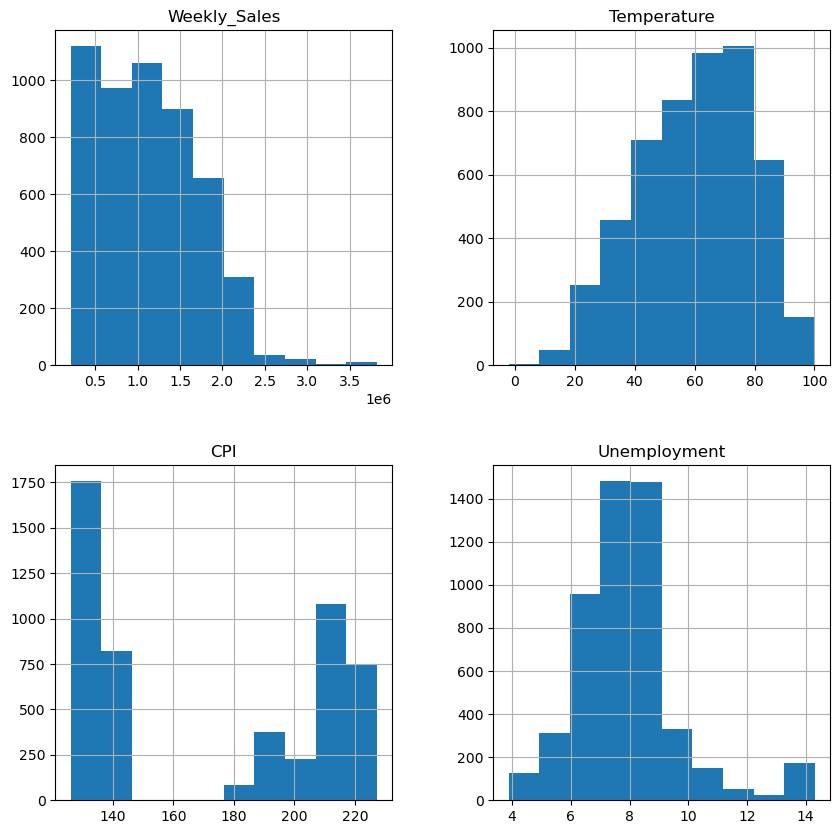

In [54]:
pre_df.hist(figsize=(10,10))

In [55]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:, 1:] , pre_df.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.767
Model:                            OLS   Adj. R-squared (uncentered):              0.767
Method:                 Least Squares   F-statistic:                              5576.
Date:                Wed, 01 May 2024   Prob (F-statistic):                        0.00
Time:                        16:49:07   Log-Likelihood:                         -74964.
No. Observations:                5085   AIC:                                  1.499e+05
Df Residuals:                    5082   BIC:                                  1.500e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [57]:
get_vif(features)

,vif_score,feature
0,11.597683,Temperature
1,11.038776,CPI
2,9.826553,Unemployment


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_df.iloc[:,1:], pre_df.iloc[:,0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.5, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [59]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [60]:
predict = l_r.predict(X_test)
get_evaluation(y_test, predict )

MSE: 317195887182.4467, RMSE: 563201.4623, MSLE: 0.3504, RMSLE: 0.5919, R2: 0.0382


In [61]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.5, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [62]:
predict = l_r.predict(X_test)
get_evaluation(y_test, predict )

MSE: 290547356422.2239, RMSE: 539024.4488, MSLE: 0.3225, RMSLE: 0.5679, R2: 0.1190


In [79]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_df)
std_pre_df1 = pd.DataFrame(result, columns=pre_df.columns)
std_pre_df1


,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1.057420,-0.995136,-1.713800,1.004175,0.056964
1,1.054348,-1.201170,-1.766089,1.007880,0.056964
2,1.001206,-1.124178,-1.840166,1.009074,0.056964
3,0.642828,-0.760907,-1.737766,1.009849,0.056964
4,0.899914,-0.767955,-1.598328,1.010624,0.056964
...,...,...,...,...,...
6430,-0.591489,0.228602,1.390883,0.519270,0.365109
6431,-0.555551,0.229144,1.364738,0.523256,0.356046
6432,-0.553762,-0.335825,1.397419,0.527241,0.356046
6433,-0.582715,-0.227385,1.329879,0.527332,0.356046


In [80]:
condition = True

for column in std_pre_df1.columns:
    condition &= std_pre_df1[column].between(-1.96, 1.96)

std_pre_df1 = std_pre_df1[condition]
std_pre_df1

std_pre_df1.reset_index(drop=True, inplace=True)

In [81]:
std_pre_df1

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1.057420,-0.995136,-1.713800,1.004175,0.056964
1,1.054348,-1.201170,-1.766089,1.007880,0.056964
2,1.001206,-1.124178,-1.840166,1.009074,0.056964
3,0.642828,-0.760907,-1.737766,1.009849,0.056964
4,0.899914,-0.767955,-1.598328,1.010624,0.056964
...,...,...,...,...,...
5563,-0.591489,0.228602,1.390883,0.519270,0.365109
5564,-0.555551,0.229144,1.364738,0.523256,0.356046
5565,-0.553762,-0.335825,1.397419,0.527241,0.356046
5566,-0.582715,-0.227385,1.329879,0.527332,0.356046


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = std_pre_df1.iloc[:,:-1], std_pre_df1.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.5, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [87]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [88]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.3854, RMSE: 0.6208, R2: 0.1116


array([[<Axes: title={'center': 'Weekly_Sales'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'Fuel_Price'}>,
        <Axes: title={'center': 'CPI'}>],
       [<Axes: title={'center': 'Unemployment'}>, <Axes: >]], dtype=object)

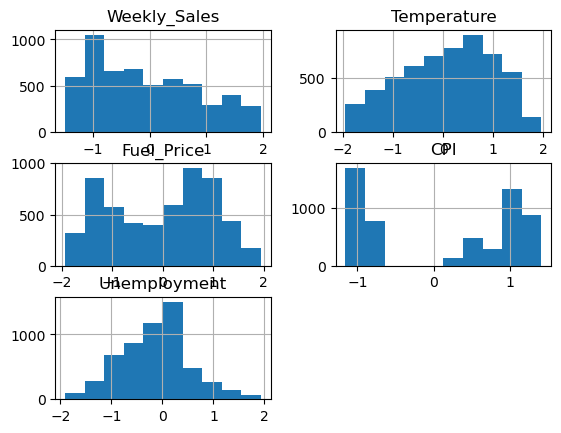

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression


features, targets = std_pre_df1.iloc[:,:-1], std_pre_df1.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.5, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.2890, RMSE: 0.5376, R2: 0.3338
RandomForestRegressor
MSE: 0.1473, RMSE: 0.3838, R2: 0.6604
GradientBoostingRegressor
MSE: 0.2246, RMSE: 0.4739, R2: 0.4823
XGBRegressor
MSE: 0.1675, RMSE: 0.4093, R2: 0.6139
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 2784, number of used features: 4
[LightGBM] [Info] Start training from score -0.126736
LGBMRegressor
MSE: 0.1640, RMSE: 0.4049, R2: 0.6221


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression


features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.5, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 1.6277, RMSE: 1.2758, R2: 0.5588
RandomForestRegressor
MSE: 0.8183, RMSE: 0.9046, R2: 0.7782
GradientBoostingRegressor
MSE: 1.3429, RMSE: 1.1588, R2: 0.6360
XGBRegressor
MSE: 0.9363, RMSE: 0.9676, R2: 0.7462
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3217, number of used features: 4
[LightGBM] [Info] Start training from score 8.019747
LGBMRegressor
MSE: 0.8723, RMSE: 0.9340, R2: 0.7636


In [94]:
pre_df

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,42.31,2.572,211.096358,8.106
1,1641957.44,38.51,2.548,211.242170,8.106
2,1611968.17,39.93,2.514,211.289143,8.106
3,1409727.59,46.63,2.561,211.319643,8.106
4,1554806.68,46.50,2.625,211.350143,8.106
...,...,...,...,...,...
6430,713173.95,64.88,3.997,192.013558,8.684
6431,733455.07,64.89,3.985,192.170412,8.667
6432,734464.36,54.47,4.000,192.327265,8.667
6433,718125.53,56.47,3.969,192.330854,8.667


#### 결론
- 전처리 과정없이 작업 한 데이터가 가장 R2 Score가 가장 높으며 성능이 좋은 것을 알 수 있습니다.
- RandomForest : 0.7782